In [83]:
### To Predict the strength of the concrete
### Regression-Supervised learning

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
df=pd.read_csv("concrete.csv")

In [86]:
df.sample(10)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
647,322.0,0.0,116.0,196.0,10.0,818.0,813.0,28,31.18
711,287.3,120.5,93.9,187.6,9.2,904.4,695.9,28,43.80
901,475.0,0.0,0.0,228.0,0.0,932.0,594.0,365,41.93
755,349.0,0.0,0.0,192.0,0.0,1047.0,806.0,360,42.13
476,439.0,177.0,0.0,186.0,11.1,884.9,707.9,91,73.30
891,313.3,262.2,0.0,175.5,8.6,1046.9,611.8,91,66.60
319,339.0,0.0,0.0,185.0,0.0,1069.0,754.0,28,31.84
836,212.0,0.0,124.8,159.0,7.8,1085.4,799.5,100,47.82
696,307.0,0.0,0.0,193.0,0.0,968.0,812.0,180,34.49
451,313.3,262.2,0.0,175.5,8.6,1046.9,611.8,56,64.90


In [87]:
df.shape

(1030, 9)

In [88]:
df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

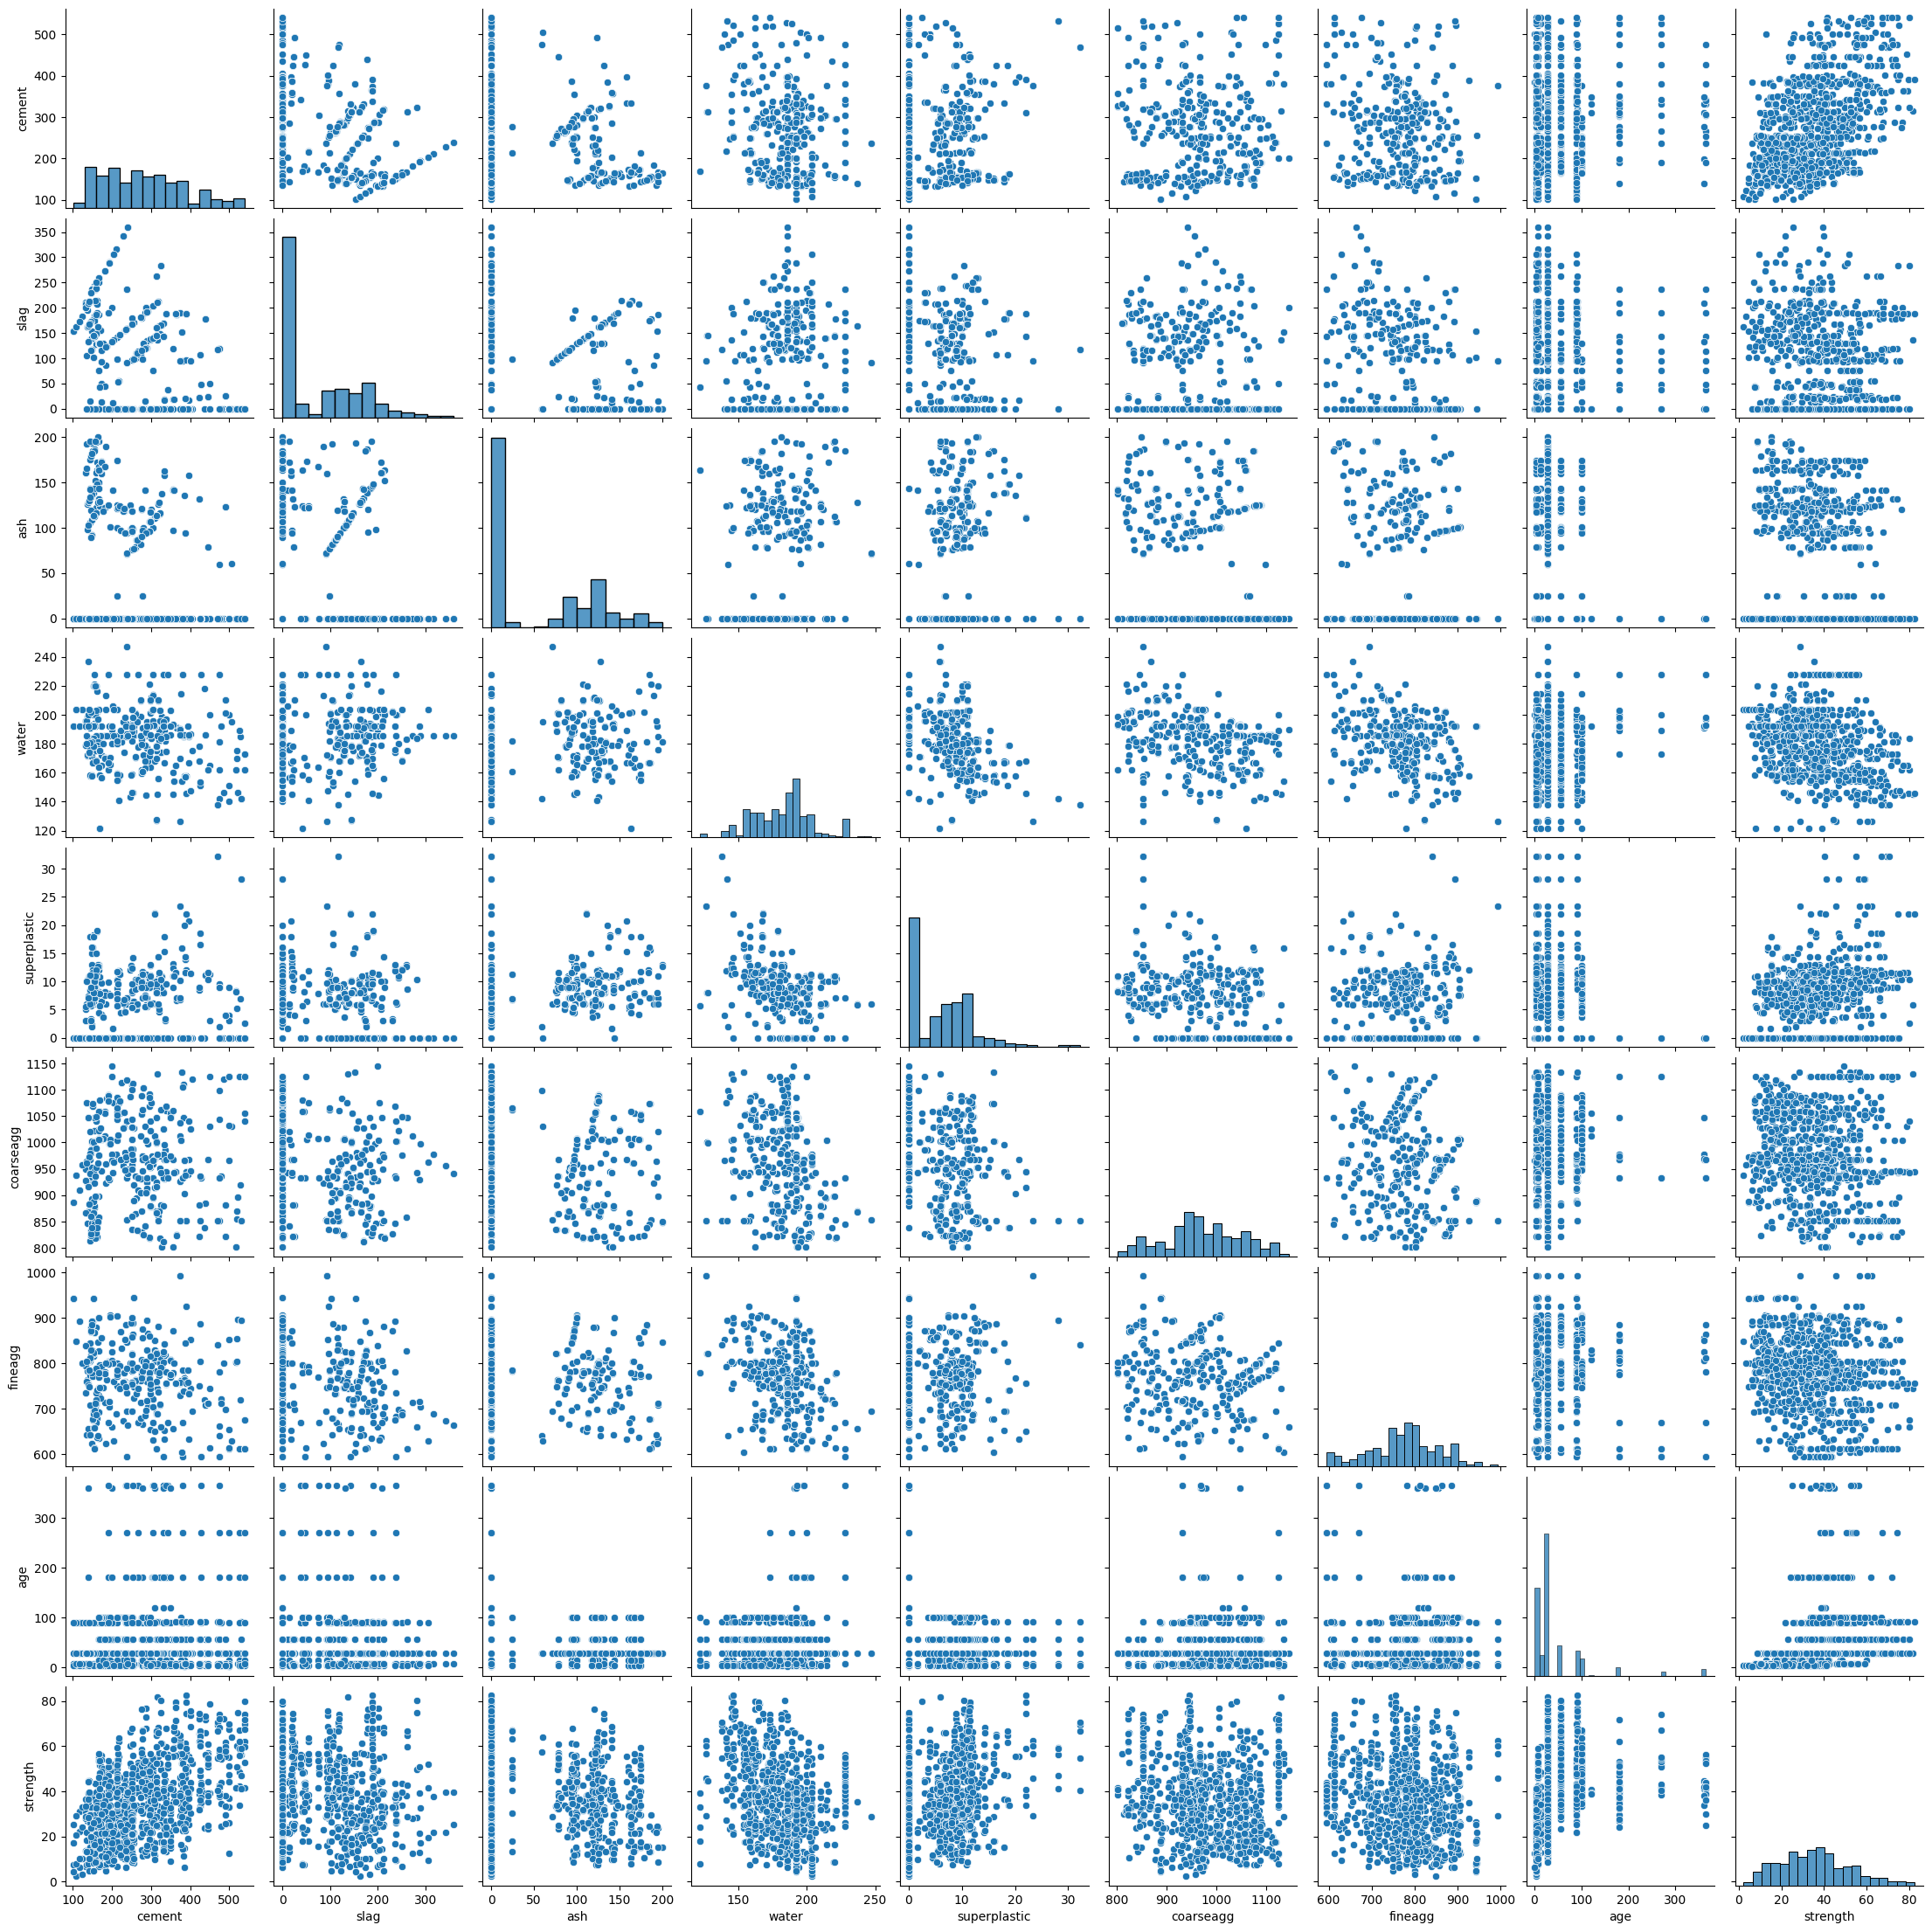

In [89]:
sns.pairplot(df)

In [90]:
df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


<Axes: xlabel='slag'>

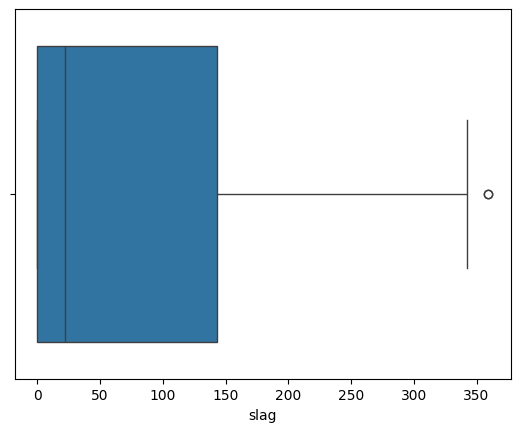

In [91]:
sns.boxplot(x="slag",data=df)

In [92]:
df.skew()

cement          0.509481
slag            0.800717
ash             0.537354
water           0.074628
superplastic    0.907203
coarseagg      -0.040220
fineagg        -0.253010
age             3.269177
strength        0.416977
dtype: float64

In [93]:
df.corr()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


In [94]:
### Basic Model building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [95]:
X=df.drop(["strength"],axis=1)
y=df[["strength"]]

In [96]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1,test_size=0.3)

In [97]:
model_lr=LinearRegression()

In [98]:
model_lr.fit(X_train,y_train)

LinearRegression()

In [99]:
model_lr.score(X_train,y_train)

0.603148754063023

In [100]:
model_lr.score(X_test,y_test)

0.6339136715208276

In [101]:
from sklearn.neighbors import KNeighborsRegressor

In [102]:
model_knn=KNeighborsRegressor(n_neighbors=7)

In [103]:
model_knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=7)

In [104]:
model_knn.score(X_train,y_train)

0.751499485311219

In [105]:
model_knn.score(X_test,y_test)

0.7053733189693319

In [106]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train2, y_train)

#In sample (training) R^2 will always improve with the number of variables!
print(poly_clf.score(X_train2, y_train))

0.7549578268848262


In [107]:
print(poly_clf.score(X_test2, y_test))

0.7444710081439627


In [108]:
import warnings
warnings.filterwarnings("ignore")

In [109]:
from sklearn.svm import SVR
model_svm = SVR(kernel="linear", C=2.0, gamma=0.5)
model_svm.fit(X_train,y_train)
model_svm.score(X_train,y_train)

0.5846810252770243

In [110]:
model_svm.score(X_test,y_test)

0.6308316965582915

In [111]:
from sklearn.tree import DecisionTreeRegressor
model_dt=DecisionTreeRegressor()
model_dt=DecisionTreeRegressor(max_depth=10,min_samples_leaf=15,min_samples_split=2 )

In [112]:
model_dt.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=15)

In [113]:
model_dt.score(X_train,y_train)

0.8309878846584784

In [114]:
model_dt.score(X_test,y_test)

0.8112520708374323

In [115]:
#pip install gradio

In [118]:
import gradio as gr
import pandas as pd
from sklearn.linear_model import LinearRegression


# Define a function to make predictions
def predict_strength(cement, slag, ash, water, superplastic, coarseagg, fineagg, age):
    data = pd.DataFrame({
        "cement": [cement],
        "slag": [slag],
        "ash": [ash],
        "water": [water],
        "superplastic": [superplastic],
        "coarseagg": [coarseagg],
        "fineagg": [fineagg],
        "age": [age]
    })
    prediction = model_dt.predict(data)[0]
    return prediction

# Create a Gradio interface
input_components = [
    gr.Number(label="Cement"),
    gr.Number(label="Slag"),
    gr.Number(label="Ash"),
    gr.Number(label="Water"),
    gr.Number(label="Superplastic"),
    gr.Number(label="Coarseagg"),
    gr.Number(label="Fineagg"),
    gr.Number(label="Age"),
]
output_component = gr.Textbox(label="Predicted Strength")

gr.Interface(predict_strength, inputs=input_components, outputs=output_component, title="Concrete Strength Prediction").launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://cb9aad6f61625b8aa9.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [119]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [123]:
from sklearn.ensemble import AdaBoostRegressor

In [120]:

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor

In [127]:
model_abc=AdaBoostRegressor(n_estimators=100)
model_abc.fit(X_train,y_train)

AdaBoostRegressor(n_estimators=100)

In [128]:
model_abc.score(X_train,y_train)

0.8223361046607731

In [129]:
model_abc.score(X_test,y_test)

0.7729287703970557